# Машинное обучение

## Практическое задание 3. Linear Regression

### Общая информация
Дата выдачи: 18.10.2021


Мягкий дедлайн: 23:30MSK 2.11.2021

Жетский дедлайн: 23:30MSK 7.11.2021

Ваша итоговая оценка умножается на (1 - 0.1*`количество задержанных дней от мягкого дедлайна`)

### О задании
В этом задании мы попытаемся использовать полученные знания из предыдущего домашнего задания. Будем использовать `sklearn`, а заодно сравним Lasso- и Ridge-регрессии. 

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linreg-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 14.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (2 балла + 1 бонусный балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее.

In [2]:
train = pd.read_csv('train.csv')
train

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

**Задание 2 (1 балл)**.

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE? (код писать не надо)

**Ответ**: Если представить, что эта модель будет использоваться в реальных приложениях при расчёте примерного времени поездки, то логично предположить, что больший штраф в метрике должен быть за слишком низкое предсказание, чем за слишком высокое, поскольку клиент будет недоволен, если его не привезут в расчётное время, а если время окажется меньше, то недовольства не будет. Из-за свойств логарифма, именно эта модель обладает таким свойством.

**[Бонус] Задание 2\* (1 балл).**
На семинаре мы рассматривали несколько моделей линейной регрессии в sklearn, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос:** Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство:** покажем, что $\text{RMSLE}(X, y, a) = \text{RMSE}(X, \hat{y}, \hat{a})$.

Действительно, $\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(\exp(\hat{a}(x_i))}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell}\big(\hat{y}_i - \hat{a}(x_i)\big)^2} = \text{RMSE}(X, \hat{y}, \hat{a})$

А так как между всевозможными регрессионными моделями $a$ и $\hat{a}$ есть взаимно-однозначное соответствие, то модели, оптимизирующей $\text{RMSE}(X, \hat{y}, \hat{a})$ будет соответствовать модель, оптимизирующая $\text{RMSLE}(X, y, a)$, ведь в противном случае (т. е. если бы нашлась модель $b$ такая, что $\text{RMSLE}(X, y, b) < \text{RMSLE}(X, y, a)$, то нашлась бы соответствующая ей модель $\hat{b}$ такая, что $\text{RMSE}(X, \hat{y}, \hat{b}) < \text{RMSE}(X, \hat{y}, \hat{a})$, что противоречит предположению об оптимальности модели $\hat{a}$.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать!

## Часть 2. Feature engineering (3 балла)

**Задание 3 (2 балл)**. На основе предыдущей лабы (пожалуйста, переиспользуйте свой код), построите все ранее изученные свойства (на основе координат, времени, вендора, т.д.), которые будут полезны для модели. Не забудьте закодировать все категориальные признаки с помощью `OneHotEncoder`, а численные признаки отмасштабирровать с помощью `StandardScaler`.

In [3]:
from haversine import haversine, Unit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['weekday'] = train['pickup_datetime'].dt.strftime('%w')
train['day'] = train['pickup_datetime'].dt.strftime('%j')
train['hour'] =  train['pickup_datetime'].dt.strftime('%H')
train['month'] = train['pickup_datetime'].dt.strftime('%m')
train['blizzard'] = np.where((train['pickup_datetime'].dt.strftime('%m') == '01') & (train['pickup_datetime'].dt.strftime('%d').astype(int).between(23, 25)), 1, 0)
train['delays'] = np.where((train['pickup_datetime'].dt.strftime('%m') == '05') & (train['pickup_datetime'].dt.strftime('%d').astype(int).between(29, 30)), 1, 0)
train['haversine'] = train.apply(lambda x: haversine((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])), axis=1)
train['log_haversine'] = np.log(train['haversine'].values + 1)
train['jams'] = np.where((train['hour'].astype(int).between(7, 18)) & (train['weekday'].astype(int).between(1, 5)), 1, 0)
train['free'] = np.where(train['hour'].astype(int).between(1, 6), 1, 0)
categories = ['weekday', 'month']
ohe = OneHotEncoder(categories='auto')
ss = StandardScaler()
feature_arr = ohe.fit_transform(train[categories]).toarray()
feature_labels = ohe.get_feature_names_out(categories)
x = pd.DataFrame(feature_arr, columns=feature_labels, dtype=int)
train[feature_labels] = x[feature_labels]
numerical = ['hour', 'day']
train[numerical] = ss.fit_transform(train[numerical])
train

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  \
0               -73.964630         40.765602                  N  ...   
1               -73.999481         40.731152                  N  ...   
2               -74.005333         40.710087                  N  ...   
3               -74.012268         40.706718                  N  ...   
4               -73.972923         40.782520                  N  ...   
...                    ...               ...                ...  ...   
1458639         -73.994911         40.740170                  N  ...   
1458640         -73.970184         40.796547                  N  ...   
1458641         -74.004433         40.707371                  N  ...   
1458642         -73.974632         40.757107                  N  ...   
1458643         -73.972809         40.790585                  N  ...   

         weekday_3 weekday_4  weekday_5  weekday_6 month_01  month_02  \
0                0         0          0          0        0         0   
1                0         0          0          0        0         0   
2                0         0          0          0        1         0   
3                1         0          0          0        0         0   
4                0         0          0          1        0         0   
...            ...       ...        ...        ...      ...       ...   
1458639          0         0          1          0        0         0   
1458640          0         0          0          0        1         0   
1458641          0         0          1          0        0         0   
1458642          0         0          0          0        1         0   
1458643          0         0          0          0        0         0   

         month_03  month_04  month_05  month_06  
0               1         0         0         0  
1               0         0         0         1  
2               0         0         0         0  
3               0         1         0         0  
4               1         0         0         0  
...           ...       ...       ...       ...  
1458639         0         1         0         0  
1458640         0         0         0         0  
1458641         0         1         0         0  
1458642         0         0         0         0  
1458643         0         1         0         0  

[1458644 rows x 34 columns]

In [4]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'weekday', 'day', 'hour', 'month', 'blizzard',
       'delays', 'haversine', 'log_haversine', 'jams', 'free', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05',
       'month_06'],
      dtype='object')

Не забудьте обосновать, почему именно эти свойства будут полезными, можно ссылаться на свой разведочный анализ данных из предыдущей работы.

**Ответ**: День в году, час дня, день недели и месяц полезны, поскольку по построенным во второй домашней работе графикам видна зависимость времени поездки от этих признаков.

Первые два признака - численные, последние два - категориальные.

Также я добавил признаки для периода загруженных и свободных дорог, которые я вычислил во второй домашней работе, построив heatmap длительности поездки для часа дня и дня недели.


**Задание 4 (0.5 баллов)**. В прошлом домашнем задании вы обучали Ridge-регрессию со стандартными параметрами, давайте посмотрим еще раз на ее результаты на основе выше подготовленных вами свойствах. *Не меняйте целевую переменную.* 

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X = train[['day', 'hour', 'blizzard', 'delays', 'haversine', 'jams', 'free', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06']]
y = train['trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = Ridge()
model.fit(X_train, y_train)
print('Mean RMSE for X_train:', np.sqrt(np.square(np.subtract(y_train.mean(), y_train)).mean()))
print('Mean RMSE for X_test:', np.sqrt(np.square(np.subtract(y_train.mean(), y_test)).mean()))
print('')
print('Ridge RMSE for X_train:', np.sqrt(np.square(np.subtract(model.predict(X_train), y_train)).mean()))
print('Ridge RMSE for X_test:', np.sqrt(np.square(np.subtract(model.predict(X_test), y_test)).mean()))

Mean RMSE for X_train: 4784.926331803232
Mean RMSE for X_test: 6165.442087436215

Ridge RMSE for X_train: 4757.241377399755
Ridge RMSE for X_test: 6144.94191320555


**Задание 5 (0.5 баллов)**. Обучите Ridge-регрессию со стандартными параметрами на том же наборе данных, но замените время поездки на логарифм времени поездки.

In [6]:
X = train[['day', 'hour', 'blizzard', 'delays', 'log_haversine', 'jams', 'free', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06']]
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
y = train['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = Ridge()
model.fit(X_train, y_train)
print('Mean RMSLE for X_train:', np.sqrt(np.square(np.subtract(y_train.mean(), y_train)).mean()))
print('Mean RMSLE for X_test:', np.sqrt(np.square(np.subtract(y_train.mean(), y_test)).mean()))
print('')
print('Ridge RMSLE for X_train:', np.sqrt(np.square(np.subtract(model.predict(X_train), y_train)).mean()))
print('Ridge RMLSE for X_test:', np.sqrt(np.square(np.subtract(model.predict(X_test), y_test)).mean()))

Mean RMSLE for X_train: 0.7967238943268634
Mean RMSLE for X_test: 0.7935038309802468

Ridge RMSLE for X_train: 0.5018262548684475
Ridge RMLSE for X_test: 0.4981772634542502


Сравните результаты. Отличаются ли они, если да, то почему? Если изменения целевой переменной дало лучший результат, далее посмоянно предсказывайте логарифм. 

**Ответ**: Предсказание исходного таргета даёт куда худший результат, чем предсказание логирифма таргета. Связано это с тем, что время поездки равно произведению средней скорости поездки на длину пути.

Мы можем хорошо оценить длину пути, а также кое-как оценить среднюю скорость (по времени начала поездки). Построенная нами модель $\hat{a}$ представляет собой произведение степеней признаков минус один.

А модель $a$ - линейную комбинацию этих признаков. Понятно, что в рамках модели $\hat{a}$ получается лучше предсказать время поездки, потому что там средняя скорость умножается на длину пути, а не берётся их линейная комбинация.

## Часть 3. Сравниваем линейные модели (3 балла)

**Задание 6 (0.5 баллов)**. Обучите Lasso-регрессию со стандартными параметрами на том же наборе данных.

In [7]:
from sklearn import linear_model

lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
print('Mean RMSLE for X_train:', np.sqrt(np.square(np.subtract(y_train.mean(), y_train)).mean()))
print('Mean RMSLE for X_test:', np.sqrt(np.square(np.subtract(y_train.mean(), y_test)).mean()))
print('')
print('Lasso RMSLE for X_train:', np.sqrt(np.square(np.subtract(lasso.predict(X_train), y_train)).mean()))
print('Lasso RMLSE for X_test:', np.sqrt(np.square(np.subtract(lasso.predict(X_test), y_test)).mean()))

Mean RMSLE for X_train: 0.7967238943268634
Mean RMSLE for X_test: 0.7935038309802468

Lasso RMSLE for X_train: 0.7967238943268634
Lasso RMLSE for X_test: 0.7935038309802468


**Задание 7 (0.5 баллов)**. Давайте посмотрим на веса Ridge-регрессии и Lasso-регрессии. Проверьте, какое количество весов у вас занулилилось для каждой модели. 

In [8]:
print(f"Number of zero weights in Ridge model: {model.coef_.size - np.count_nonzero(model.coef_)}")
print(f"Number of zero weights in Lasso model: {lasso.coef_.size - np.count_nonzero(lasso.coef_)}")

Number of zero weights in Ridge model: 0
Number of zero weights in Lasso model: 20


**Задание 8 (1 балл)**. Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для Ridge и Lasso, на тестовой выборке измерьте качество лучшей полученной модели.

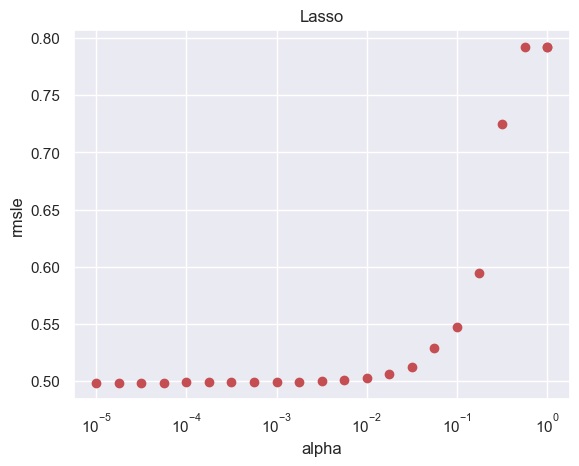

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
a = 1
lasso = linear_model.Lasso(alpha=a)
lasso.fit(X_train, y_train)
rmsle = [np.sqrt(np.square(np.subtract(lasso.predict(X_val), y_val)).mean())]
alphas = [a]
while (a > 0.00001):
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    rmsle.append(np.sqrt(np.square(np.subtract(lasso.predict(X_val), y_val)).mean()))
    alphas.append(a)
    a = a / (10 ** 0.25)
plt.title('Lasso')
plt.xscale('log')
plt.plot(alphas, rmsle, 'ro')
plt.xlabel('alpha')
plt.ylabel('rmsle')
plt.show()

Видно, что оптимальным выбором в обоих случаях будет $\alpha = 10^{-3}$. Для Ridge я не строил график, т. к. там значение метрики крайне мало зависело от значения 

In [10]:
lasso = linear_model.Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)
ridge = linear_model.Ridge(alpha = 0.001)
ridge.fit(X_train, y_train)
print('Ridge RMSLE for X_train:', np.sqrt(np.square(np.subtract(ridge.predict(X_train), y_train)).mean()))
print('Ridge RMSLE for X_test:', np.sqrt(np.square(np.subtract(ridge.predict(X_test), y_test)).mean()))
print('')
print('Lasso RMSLE for X_train:', np.sqrt(np.square(np.subtract(lasso.predict(X_train), y_train)).mean()))
print('Lasso RMLSE for X_test:', np.sqrt(np.square(np.subtract(lasso.predict(X_test), y_test)).mean()))

Ridge RMSLE for X_train: 0.5026175377097097
Ridge RMSLE for X_test: 0.4981814149131617

Lasso RMSLE for X_train: 0.5029700908206703
Lasso RMLSE for X_test: 0.4985396669506887


**Задание 9 (1 балл).** Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [11]:
a = 1
lasso = linear_model.Lasso(alpha=a)
lasso.fit(X_train, y_train)
zero_weights = [lasso.coef_.size - np.count_nonzero(lasso.coef_)]
alphas = [a]
while (np.count_nonzero(lasso.coef_) < lasso.coef_.size - np.count_nonzero(lasso.coef_)):
    lasso = linear_model.Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    zero_weights.append(lasso.coef_.size - np.count_nonzero(lasso.coef_))
    alphas.append(a)
    a = a / (10 ** 0.1)
print(f"number of non-zero weights: {np.count_nonzero(lasso.coef_)}" )
print(f"number of zero weights: {lasso.coef_.size - np.count_nonzero(lasso.coef_)}")
print(f'Lasso with alpha={a} RMSLE for X_train: {np.sqrt(np.square(np.subtract(lasso.predict(X_train), y_train)).mean())}')
print(f'Lasso with alpha={a} RMLSE for X_test:: {np.sqrt(np.square(np.subtract(lasso.predict(X_test), y_test)).mean())}\n')

number of non-zero weights: 10
number of zero weights: 10
Lasso with alpha=0.0015848931924611115 RMSLE for X_train: 0.5033214844017316
Lasso with alpha=0.0015848931924611115 RMLSE for X_test:: 0.498882154250446



Сравнивая с результатами Ridge-регрессии, видим, что мы немного потеряли в качестве, при этом избавившись от половины признаков.

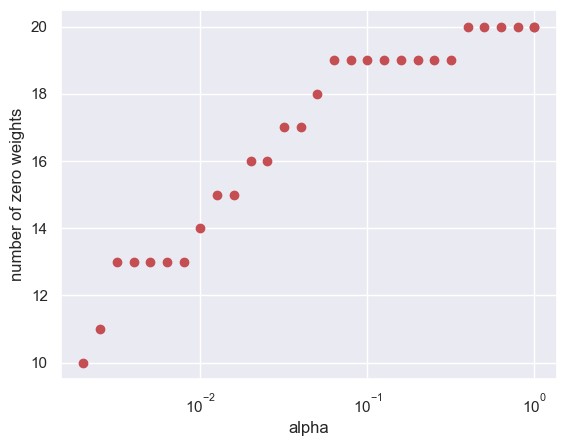

In [12]:
plt.xscale('log')
plt.plot(alphas, zero_weights, 'ro')
plt.xlabel('alpha')
plt.ylabel('number of zero weights')
plt.show()

## Часть 4. Улучшаем дальше (2 балла)

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 10 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Надеюсь, что вы можете переиспользовать признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка" из предыдущей работы. 

Если вы не делали это задание в прошлой работе, можете придумать ещё какой-нибудь способ сделать признаки про маршрут. 

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.


**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: Такой признак может быть полезен, поскольку определённые улицы в городе могут быть загружены больше, чем другие. А самым частым парам клеток и будут соответствовать самые загруженные улицы. Линейная модель не может вытащить эту информацию, потому что нельзя, зная статистику поездок отдельно по поездкам, начавшимся в конкретной клетке и отдельно по закончившимся в конкретной клетке, вытащить статистику по самым частым парам клеток.

In [13]:
import math
import collections

Nlat, Nlon = 6, 4
lat1, lon1 = 40.7, -74
lat2, lon2 = 40.8, -73.92

def get_cell(lat, lon):
    if((lat > lat2) | (lat < lat1) | (lon < lon1) | (lon > lon2)):
        return -1
    latpoint = (lat - lat1) / (lat2 - lat1)
    lonpoint = (lon - lon1) / (lon2 - lon1)
    latCell = math.floor(latpoint * Nlat)
    lonCell = math.floor(lonpoint * Nlon)
    return latCell * Nlat + lonCell

def pair_of_cells(cell1, cell2):
    if((cell1 == -1) | (cell2 == -1)):
        return -1
    return (cell1, cell2)

train['pickup_cell'] = train.apply(lambda x: get_cell(x['pickup_latitude'], x['pickup_longitude']), axis=1)
train['dropoff_cell'] = train.apply(lambda x: get_cell(x['dropoff_latitude'], x['dropoff_longitude']), axis=1)
train['pair_of_cells'] = train.apply(lambda x: pair_of_cells(x['pickup_cell'], x['dropoff_cell']), axis=1)
elements_count = collections.Counter(train['pair_of_cells'])
commons = dict(elements_count.most_common(101))
route_features = list(commons.keys())
commons.pop(-1)
commons = list(commons)
train[-1] = 1
for pair in commons:
    train[pair] = np.where(train['pair_of_cells'] == pair, 1, 0)
    train[-1] = np.where(train['pair_of_cells'] == pair, 0, train[-1])
train

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  (6, 8)  \
0               -73.964630         40.765602                  N  ...       0   
1               -73.999481         40.731152                  N  ...       0   
2               -74.005333         40.710087                  N  ...       0   
3               -74.012268         40.706718                  N  ...       0   
4               -73.972923         40.782520                  N  ...       0   
...                    ...               ...                ...  ...     ...   
1458639         -73.994911         40.740170                  N  ...       0   
1458640         -73.970184         40.796547                  N  ...       0   
1458641         -74.004433         40.707371                  N  ...       0   
1458642         -73.974632         40.757107                  N  ...       0   
1458643         -73.972809         40.790585                  N  ...       0   

        (24, 32)  (6, 25)  (24, 6) (25, 20)  (12, 0)  (12, 20)  (7, 12)  \
0              0        0        0        0        0         0        0   
1              0        0        0        0        0         0        0   
2              0        0        0        0        0         0        0   
3              0        0        0        0        0         0        0   
4              0        0        0        0        0         0        0   
...          ...      ...      ...      ...      ...       ...      ...   
1458639        0        0        0        0        0         0        0   
1458640        0        0        0        0        0         0        0   
1458641        0        0        0        0        0         0        0   
1458642        0        0        0        0        0         0        0   
1458643        0        0        0        0        0         0        0   

         (7, 6)  (25, 6)  
0             0        0  
1             0        0  
2             0        0  
3             0        0  
4             0        0  
...         ...      ...  
1458639       0        0  
1458640       0        0  
1458641       0        0  
1458642       0        0  
1458643       0        0  

[1458644 rows x 139 columns]

**Задание 11 (1 балл)**. Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [14]:
old_features = ['day', 'hour', 'blizzard', 'delays', 'log_haversine', 'jams', 'free', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06']
X = train[np.concatenate((old_features, route_features))]
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
y = train['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = Ridge()
model.fit(X_train, y_train)
print('Mean RMSLE for X_train:', np.sqrt(np.square(np.subtract(y_train.mean(), y_train)).mean()))
print('Mean RMSLE for X_test:', np.sqrt(np.square(np.subtract(y_train.mean(), y_test)).mean()))
print('')
print('Ridge RMSLE for X_train:', np.sqrt(np.square(np.subtract(model.predict(X_train), y_train)).mean()))
print('Ridge RMLSE for X_test:', np.sqrt(np.square(np.subtract(model.predict(X_test), y_test)).mean()))

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Mean RMSLE for X_train: 0.7967238943268634
Mean RMSLE for X_test: 0.7935038309802468

Ridge RMSLE for X_train: 0.48224516562389
Ridge RMLSE for X_test: 0.478476921375223


## Часть 5. Осторожно, сложно! Бонус (3 балла)

**Задание 12 (бонус, 3 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

**Точка начала координат - самый левый угол прямоугольника (относительно изображения). Ось абсцисс направлена вниз, ось ординат вверх.**

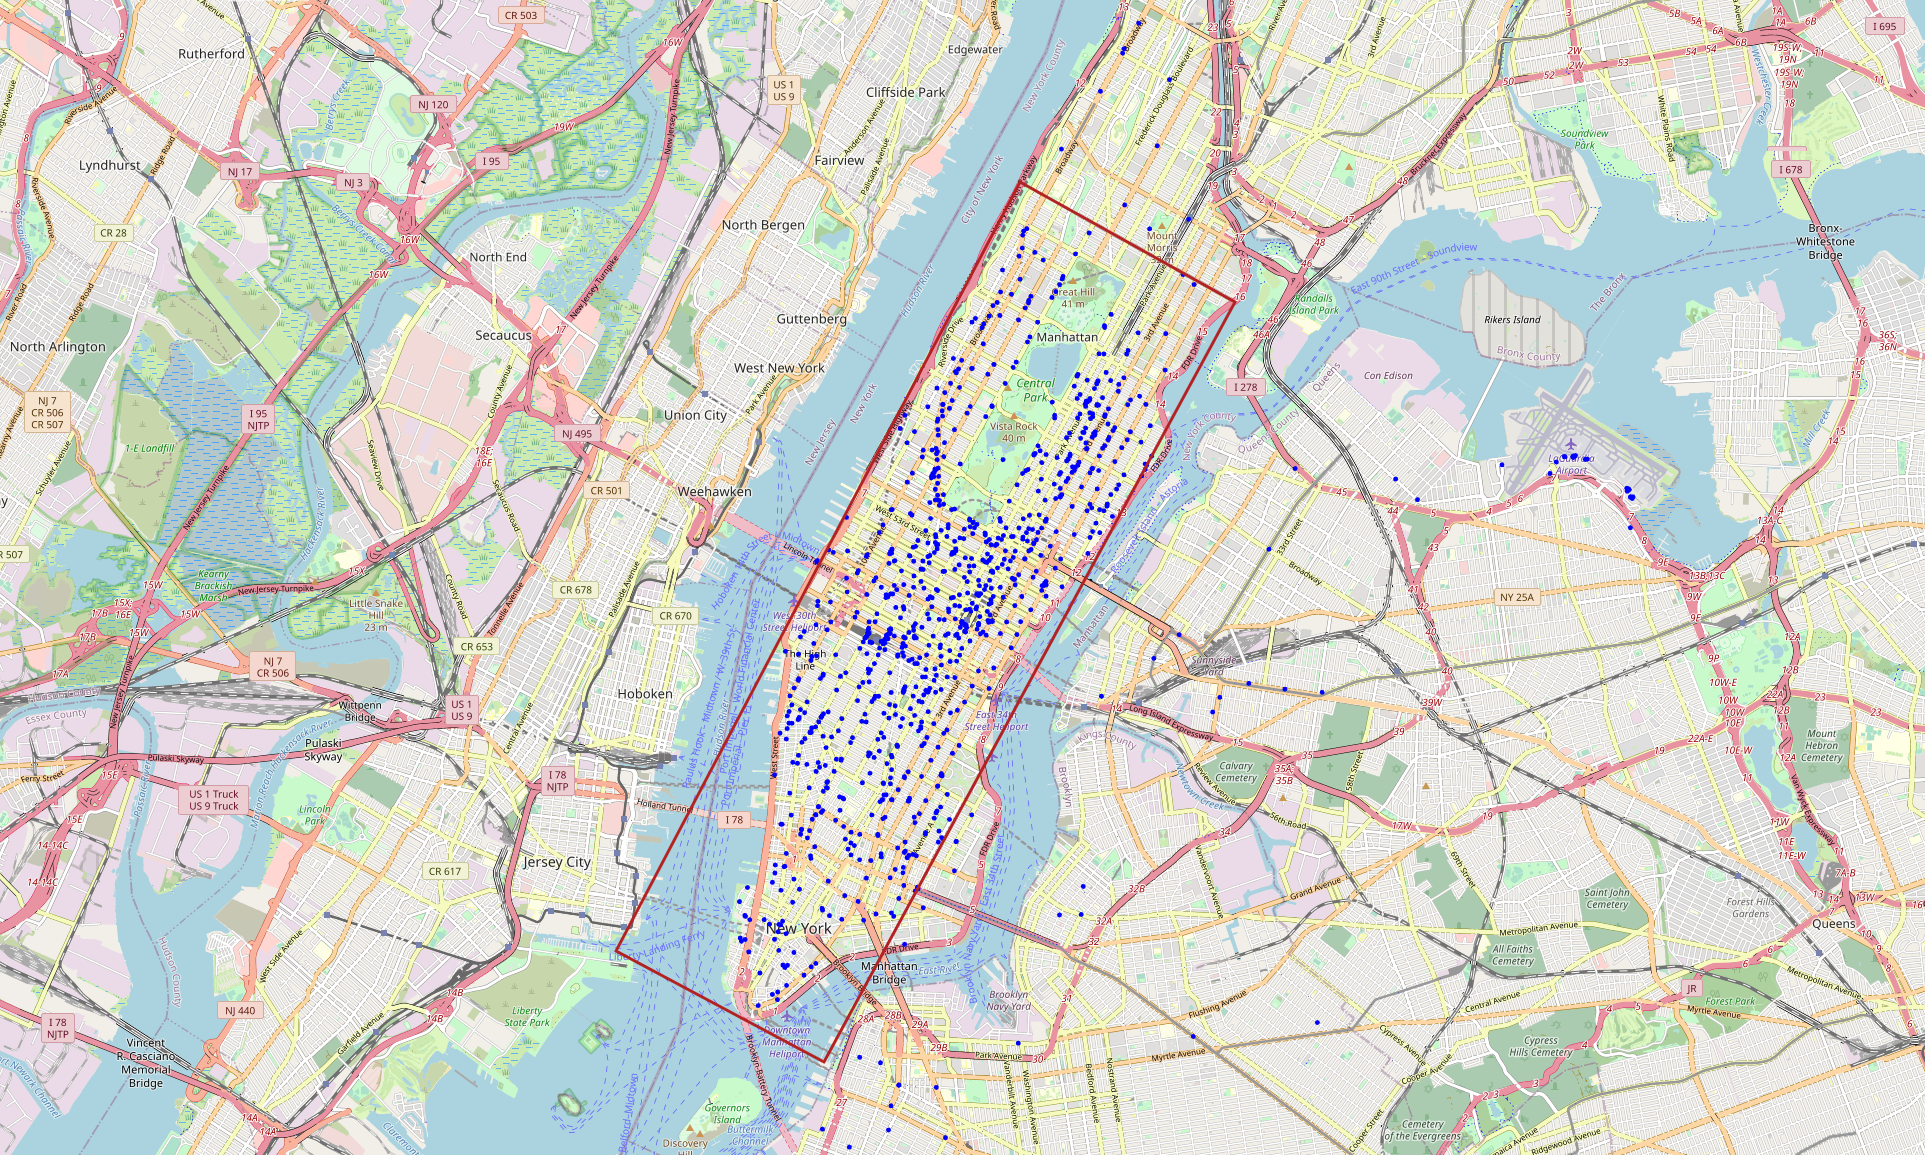

In [15]:
import folium

data = train.sample(1000)
location = (data["pickup_latitude"].mean(), data["pickup_longitude"].mean())
m = folium.Map(location=location)
for _, row in data.iterrows():
    folium.Circle(
        radius=5,
        location=(row["pickup_latitude"], row["pickup_longitude"]),
        color="blue",
        fill_color="blue",
        fill=True
    ).add_to(m)

center = (40.709817, -74.037444)
x_base = (40.695335, -74.001726)
y_base = (40.809791, -73.968091)
diagonal = (40.794151, -73.931070)

folium.Polygon([center, x_base, diagonal, y_base], color="firebrick", weight=3).add_to(m)
m

In [16]:
from numpy.linalg import inv

def coord_dist(a, b):
    return (a[0] - b[0], a[1] - b[1])

x_centered = coord_dist(x_base, center)
y_centered = coord_dist(y_base, center)
diag_centered = coord_dist(diagonal, center)
xl = haversine(center, x_base)
yl = haversine(center, y_base)
x_block = haversine((40.776885, -73.957501), (40.776192, -73.955890))
y_block = haversine((40.776885, -73.957501), (40.777517, -73.957046))
Ainv = np.array([[x_centered[0], y_centered[0]],
                 [x_centered[1], y_centered[1]]])
A = inv(Ainv)


def manhattan_distance(a1, a2):
    res = np.diagflat([xl, yl]).dot(A.dot(np.array([[a1], [a2]])))
    return abs(res[0][0]) + abs(res[1][0])

def manhattan_pos(a1, a2):
    res = np.diagflat([20, 16]).dot(A.dot(np.array([[a1 - center[0]], [a2 - center[1]]])))
    return res

def manhattan_cell(a1, a2):
    res = np.diagflat([20, 16]).dot(A.dot(np.array([[a1 - center[0]], [a2 - center[1]]])))
    a = math.floor(res[0][0])
    b = math.floor(res[1][0])
    if ((0 <= a) & (a <= 20) & (0 <= b) & (b <= 16)):
        return (a, b)
    else:
        return -1

In [17]:
train['manhattan'] = train.apply(lambda x: manhattan_distance((x['pickup_latitude'] - x['dropoff_latitude']), (x['pickup_longitude'] - x['dropoff_longitude'])), axis=1)
train['log_manhattan'] = np.log(train['manhattan'].values + 1)
train

id  vendor_id     pickup_datetime     dropoff_datetime  \
0        id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                 ...                  ...   
1458639  id2376096          2 2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1 2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2 2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1 2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1 2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  ...  (6, 25)  \
0               -73.964630         40.765602                  N  ...        0   
1               -73.999481         40.731152                  N  ...        0   
2               -74.005333         40.710087                  N  ...        0   
3               -74.012268         40.706718                  N  ...        0   
4               -73.972923         40.782520                  N  ...        0   
...                    ...               ...                ...  ...      ...   
1458639         -73.994911         40.740170                  N  ...        0   
1458640         -73.970184         40.796547                  N  ...        0   
1458641         -74.004433         40.707371                  N  ...        0   
1458642         -73.974632         40.757107                  N  ...        0   
1458643         -73.972809         40.790585                  N  ...        0   

        (24, 6)  (25, 20)  (12, 0) (12, 20)  (7, 12)  (7, 6)  (25, 6)  \
0             0         0        0        0        0       0        0   
1             0         0        0        0        0       0        0   
2             0         0        0        0        0       0        0   
3             0         0        0        0        0       0        0   
4             0         0        0        0        0       0        0   
...         ...       ...      ...      ...      ...     ...      ...   
1458639       0         0        0        0        0       0        0   
1458640       0         0        0        0        0       0        0   
1458641       0         0        0        0        0       0        0   
1458642       0         0        0        0        0       0        0   
1458643       0         0        0        0        0       0        0   

         manhattan  log_manhattan  
0         1.896089       1.063361  
1         2.523387       1.259423  
2         7.149696       2.097981  
3         1.907457       1.067279  
4         1.605647       0.957681  
...            ...            ...  
1458639   1.701265       0.993720  
1458640   6.292661       1.986869  
1458641   8.023684       2.199853  
1458642   1.223877       0.799252  
1458643   1.178405       0.778593  

[1458644 rows x 141 columns]

In [18]:
train['log_manhattan'] = np.log(train['manhattan'].values + 1)
print(np.corrcoef(train['log_haversine'], train['log_trip_duration']))
print(np.corrcoef(train['log_manhattan'], train['log_trip_duration']))

[[1.         0.74988226]
 [0.74988226 1.        ]]
[[1.         0.76347725]
 [0.76347725 1.        ]]


Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [21]:
old_features = ['day', 'hour', 'blizzard', 'delays', 'log_manhattan', 'jams', 'free', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06']
X = train[np.concatenate((old_features, route_features))]
train['log_trip_duration'] = np.log(train['trip_duration'].values + 1)
y = train['log_trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = Ridge()
model.fit(X_train, y_train)
print('Mean RMSLE for X_train:', np.sqrt(np.square(np.subtract(y_train.mean(), y_train)).mean()))
print('Mean RMSLE for X_test:', np.sqrt(np.square(np.subtract(y_train.mean(), y_test)).mean()))
print('')
print('Ridge RMSLE for X_train:', np.sqrt(np.square(np.subtract(model.predict(X_train), y_train)).mean()))
print('Ridge RMLSE for X_test:', np.sqrt(np.square(np.subtract(model.predict(X_test), y_test)).mean()))

Mean RMSLE for X_train: 0.7967238943268634
Mean RMSLE for X_test: 0.7935038309802468

Ridge RMSLE for X_train: 0.4706895476281212
Ridge RMLSE for X_test: 0.4669284147231962


**Ответ**: качество улучшилось. Манхэттэнское расстояние лучше коррелирует с длительностью поездки (вернее, их логарифмы), что даёт меньшее значение RMSLE.

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.

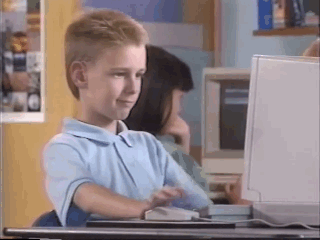